# Avaliação
## | Avaliar Modelos Criados com as Bases de Validação

### > **Objetivo do Notebook**:

Este notebook representa a 4ª e última etapa do projeto, dedicada a testar os modelos desenvolvidos nas bases T e S utilizando os dados de validação previamente separados. O objetivo desta fase é determinar qual modelo apresentou o melhor desempenho e, a partir disso, definir a abordagem ideal para a construção do modelo final, que será implementado na aplicação **Streamlit**.

## | Importando Bibliotecas

In [19]:
# Manipulação e transformação dos dados
import pandas as pd
import numpy as np

# Carregar modelos ajustados
from joblib import load

# Visualizar dados
import matplotlib.pyplot as plt

# Métricas de avaliação
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, classification_report

## | Extraindo Bases de Validação

In [21]:
# Carregando base de validação
df_valid_t = pd.read_feather('../data/processed/valid_t.ftr')
df_valid_s = pd.read_feather('../data/processed/valid_s.ftr')

# Visualizando formato
display(df_valid_t.shape)
display(df_valid_s.shape)

(3826, 39)

(3826, 12)

In [22]:
# Separando em features (X) e target (y)
X_vt = df_valid_t.drop(columns=['Target'])
y_vt = df_valid_t['Target']

X_vs = df_valid_s.drop(columns=['Target'])
y_vs = df_valid_s['Target']

# Visualizando formato
display(X_vt.shape)
display(y_vt.shape)
display(X_vs.shape)
display(y_vs.shape)

(3826, 38)

(3826,)

(3826, 11)

(3826,)

## | Carregando Modelos Criados

In [23]:
# Carregando modelos
logistic_t = load('../src/models/logistic_regression_model_base_T.joblib')
logistic_s = load('../src/models/logistic_regression_model_base_S.joblib')

# Visualizando
display(logistic_t)
display(logistic_s)

LogisticRegression(C=100, max_iter=5000, penalty='l1', random_state=412,
                   solver='saga')

LogisticRegression(C=10, max_iter=5000, penalty='l1', random_state=412,
                   solver='saga')

## | Avaliando Modelos

Para facilitar a avaliação dos modelos, a célula abaixo define uma função que calcula as principais métricas de desempenho, como **acurácia, precisão, recall, F1-score, AUC, gini e KS**. Além disso, a função gera a matriz de confusão, permitindo uma visualização clara dos erros e acertos do modelo, o que auxilia na interpretação e comparação dos resultados obtidos.

In [20]:
# Definindo funções para avaliar o modelo na base de validação
def avaliar_modelo(model: LogisticRegression , X_valid: pd.DataFrame, y_valid: pd.Series) -> None:
    '''
    Função para conduzir a avaliação do modelo criado e plotar as métricas do modelo.

    Parâmetros:
    - model: recebe o modelo de regressão logística ajustado.
    - X_valid: recebe o DataFrame do Pandas com os dados de validação das variáveis independentes.
    - y_valid: recebe o Series do Pandas com os dados de validação da variável resposta.
    '''
    # Criando previsão de classes com a base de validação
    y_pred = model.predict(X_valid)
    
    # Criando previsão de probabilidades com base de validação
    y_probs = model.predict_proba(X_valid)
    
    # Calculando métricas na base de validação
    acc = accuracy_score(y_valid, y_pred)
    auc = roc_auc_score(y_valid, y_pred)
    gini = 2 * auc - 1
    fpr, tpr, _ = roc_curve(y_valid, y_probs[:, 1])
    ks = max(tpr - fpr)
    cls_report = classification_report(y_valid, y_pred)
    
    # Visualizando métricas na base de validação
    print('='*75)
    print('Métricas do modelo na base de validação'.center(75))
    print('='*75)
    print(f'Acurácia do modelo: {acc:.2%}')
    print(f'AUC do modelo: {auc:.2%}')
    print(f'Coeficiente de Gini do modelo: {gini:.2%}')
    print(f'KS do modelo: {ks:.4f}')
    print(cls_report)
    
    # Criando e plotando matrix de confusão na base de treino
    cm = confusion_matrix(y_valid, y_pred)
    cm_disp = ConfusionMatrixDisplay(cm)
    cm_disp.plot()
    plt.show()

## | Avaliando Modelo da Base T

                  Métricas do modelo na base de validação                  
Acurácia do modelo: 90.75%
AUC do modelo: 87.98%
Coeficiente de Gini do modelo: 75.96%
KS do modelo: 0.7646
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2535
           1       0.92      0.79      0.85      1291

    accuracy                           0.91      3826
   macro avg       0.91      0.88      0.89      3826
weighted avg       0.91      0.91      0.91      3826



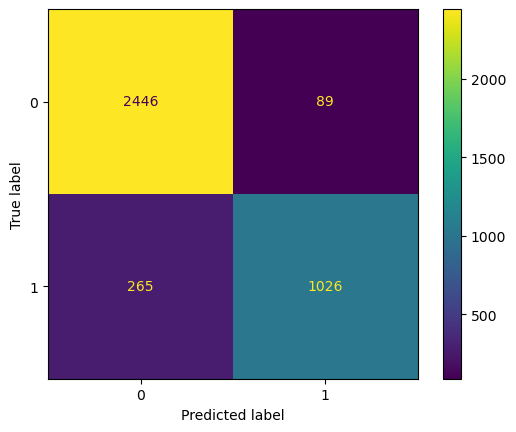

In [17]:
# Avaliando modelo da Base T
avaliar_modelo(logistic_t, X_vt, y_vt)

## | Avaliando Modelo da Base S

                  Métricas do modelo na base de validação                  
Acurácia do modelo: 90.51%
AUC do modelo: 87.65%
Coeficiente de Gini do modelo: 75.30%
KS do modelo: 0.7638
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2535
           1       0.92      0.79      0.85      1291

    accuracy                           0.91      3826
   macro avg       0.91      0.88      0.89      3826
weighted avg       0.91      0.91      0.90      3826



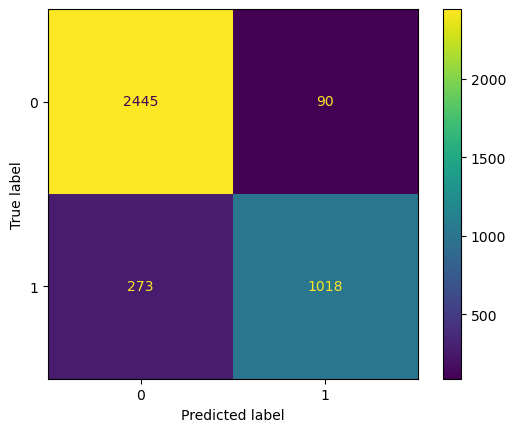

In [18]:
# Avaliando modelo da Base S
avaliar_modelo(logistic_s, X_vs, y_vs)

## | Resultados

Ambos os modelos foram avaliados utilizando a base de validação, e os resultados obtidos indicam desempenhos bastante próximos. Abaixo, destacamos as principais métricas e diferenças entre os modelos:

<a name="dicionário"></a>
| Métrica | Modelo Base T | Modelo Base S |
| ------- | ------------- | ------------ |
| Acurácia |	90.75%	| 90.51% |
| AUC	| 87.98%	| 87.65% |
| Coeficiente de Gini |	75.96%	| 75.30% |
| KS (Kolmogorov-Smirnov) |	0.7646	| 0.7638 |
| Precision (Classe 1) |	0.92	| 0.92 |
| Recall (Classe 1) |	0.79	| 0.79 |
| F1-score (Classe 1) |	0.85	| 0.85 |

## | Interpretação dos Resultados

### | Acurácia e AUC:

O modelo baseado na **Base T** apresentou um desempenho ligeiramente superior, com uma acurácia de **90.75%** contra **90.51%** do modelo baseado na **Base S**.

O **AUC (Área Sob a Curva ROC)** do modelo da **Base T** também foi um pouco maior **(87.98% vs. 87.65%)**, sugerindo que ele tem uma capacidade marginalmente melhor de distinguir entre alunos propensos e não propensos à evasão.

### | Coeficiente de Gini e KS:

O modelo da **Base T** também supera ligeiramente o da **Base S** no **Coeficiente de Gini** **(75.96% vs. 75.30%)** e na métrica **KS** **(0.7646 vs. 0.7638)**. Esses indicadores reforçam a vantagem do modelo da **Base T** na separação entre classes.

### | Métricas de Classificação (Precision, Recall e F1-score):

Ambos os modelos apresentam **precision, recall e F1-score** idênticos para a classe 1, indicando que a seleção de variáveis na **Base S** não comprometeu significativamente a qualidade da classificação.

## | Conclusão
O modelo baseado na **Base T** apresentou uma leve vantagem nas métricas de desempenho, indicando que o uso de todas as variáveis transformadas pode oferecer uma melhor capacidade preditiva.

No entanto, a **Base S** utiliza um subconjunto otimizado de variáveis, o que pode reduzir a complexidade do modelo e melhorar sua interpretabilidade, sem causar uma perda significativa de desempenho.

Por conta disso, usaremos o abordagem da **Base S** para criação do modelo final que será usado na aplicação Streamlit.